In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io

In [3]:
# Read the data

# Define the raw data as a multi-line string (tab-delimited)
data = """folder	image count	feature_extraction	vector upload
charity's windows chip	10000	2701.761941	131.7541366
w/out MPS ethans chip	10000	1775.830696	129.66721200942993 seconds
with MPS ethans chip	10000	333.89360189437866 seconds	130.0708498954773 seconds ---
charity's windows chip	10000	2947.627373456955 seconds	127.92576885223389 seconds
charity's windows chip	4950	970.4980070590973 seconds	55.044238328933716 seconds ---"""

# Read the data into a DataFrame
df = pd.read_csv(io.StringIO(data), sep='\t')

# Clean the 'feature_extraction' and 'vector upload' columns:
df['feature_extraction'] = (
    df['feature_extraction']
    .astype(str)
    .str.replace(' seconds', '', regex=False)
    .str.strip()
    .astype(float)
)
df['vector upload'] = (
    df['vector upload']
    .astype(str)
    .str.replace(' seconds', '', regex=False)
    .str.replace(' ---', '', regex=False)
    .str.strip()
    .astype(float)
)

# Create a new label column that includes the folder name and image count
df['label'] = df['folder'] + "\n(" + df['image count'].astype(str) + " images)"

print("Cleaned DataFrame:")
print(df)

Cleaned DataFrame:
                   folder  image count  feature_extraction  vector upload  \
0  charity's windows chip        10000         2701.761941     131.754137   
1   w/out MPS ethans chip        10000         1775.830696     129.667212   
2    with MPS ethans chip        10000          333.893602     130.070850   
3  charity's windows chip        10000         2947.627373     127.925769   
4  charity's windows chip         4950          970.498007      55.044238   

                                    label  
0  charity's windows chip\n(10000 images)  
1   w/out MPS ethans chip\n(10000 images)  
2    with MPS ethans chip\n(10000 images)  
3  charity's windows chip\n(10000 images)  
4   charity's windows chip\n(4950 images)  


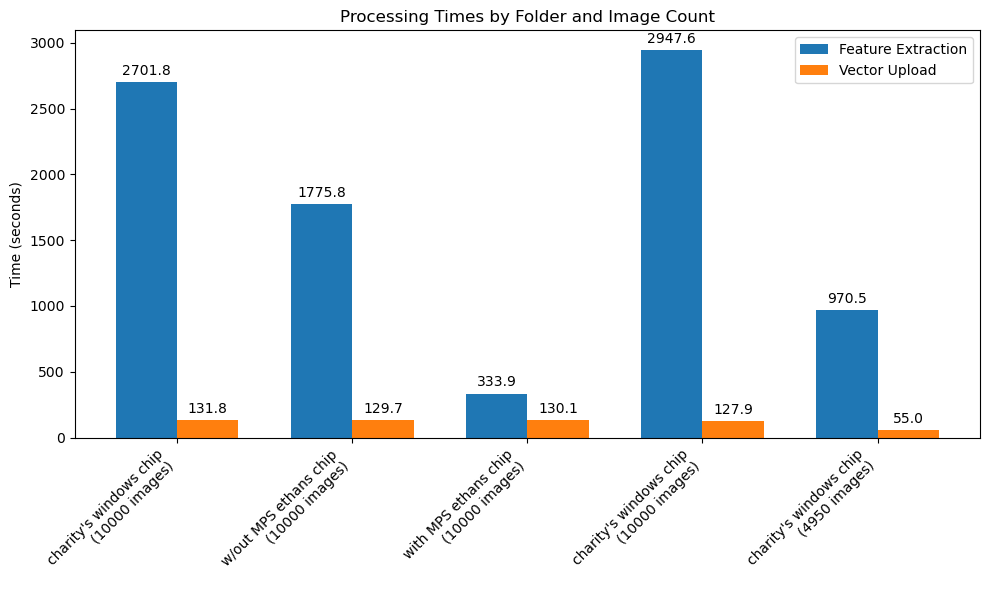

In [4]:
# Bar chart
# Visualize the data using a grouped bar chart to compare feature extraction and vector upload times
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of each bar

indices = range(len(df))

# Plot feature extraction times
bars1 = ax.bar(indices, df['feature_extraction'], width, label='Feature Extraction')

# Plot vector upload times next to them
bars2 = ax.bar([i + width for i in indices], df['vector upload'], width, label='Vector Upload')

# Set x-ticks to the middle of the grouped bars with our new label (folder name + image count)
ax.set_xticks([i + width/2 for i in indices])
ax.set_xticklabels(df['label'], rotation=45, ha='right')

# Add labels and title
ax.set_ylabel('Time (seconds)')
ax.set_title('Processing Times by Folder and Image Count')
ax.legend()

# Optionally annotate each bar with its height value for clarity
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above the bar
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above the bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

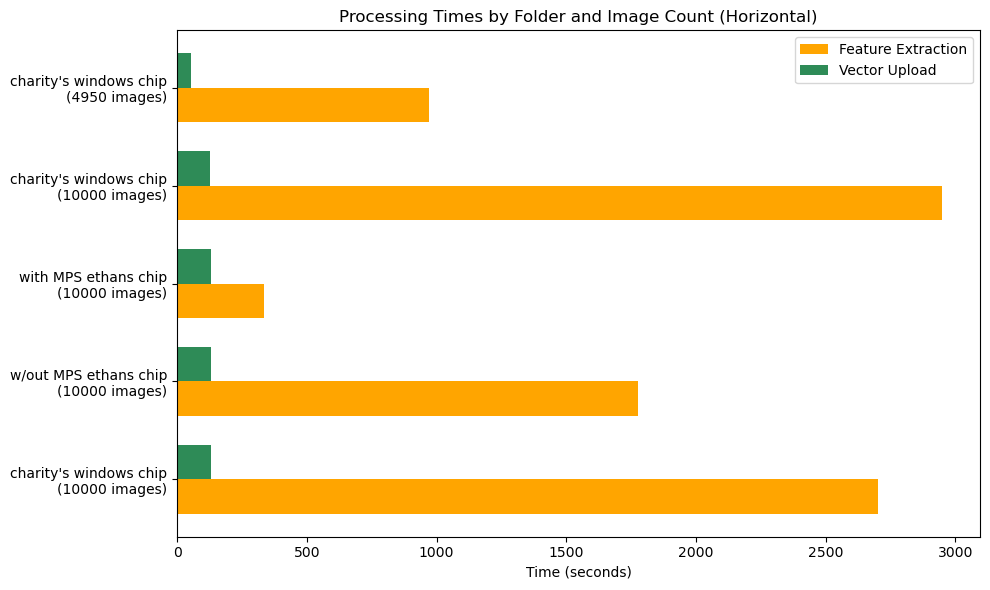

In [9]:
import numpy as np

plt.figure(figsize=(10, 6))
width = 0.35  # the width of the bars
indices = np.arange(len(df))

# Horizontal bars for feature extraction and vector upload times
plt.barh(indices, df['feature_extraction'], height=width, label='Feature Extraction', color='orange')
plt.barh(indices + width, df['vector upload'], height=width, label='Vector Upload', color='seagreen')

# Set y-ticks with labels that include folder and image count
plt.yticks(indices + width / 2, df['label'])
plt.xlabel('Time (seconds)')
plt.title('Processing Times by Folder and Image Count (Horizontal)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# F1 scores by disease labels (train-test split is 80/20)

# Create the data as a dictionary
f1_score_data = {
    "Class": [
        "Atelectasis", "Consolidation", "Infiltration", "Pneumothorac", "Edema",
        "Ephysema", "Fibrosis", "Effusion", "Pneumia", "Pleural_Thikcening",
        "Cardiomegaly", "Nodule", "Mass", "Hernia"
    ],
    "f1score": [
        0.95, 0.98, 0.90, 0.98, 0.99,
        0.99, 0.99, 0.94, 0.99, 0.98,
        0.99, 0.97, 0.97, 1.0
    ]
}

# Convert dictionary to DataFrame
f1_df = pd.DataFrame(f1_score_data)
f1_score_df = f1_df.sort_values("f1score", ascending=False)

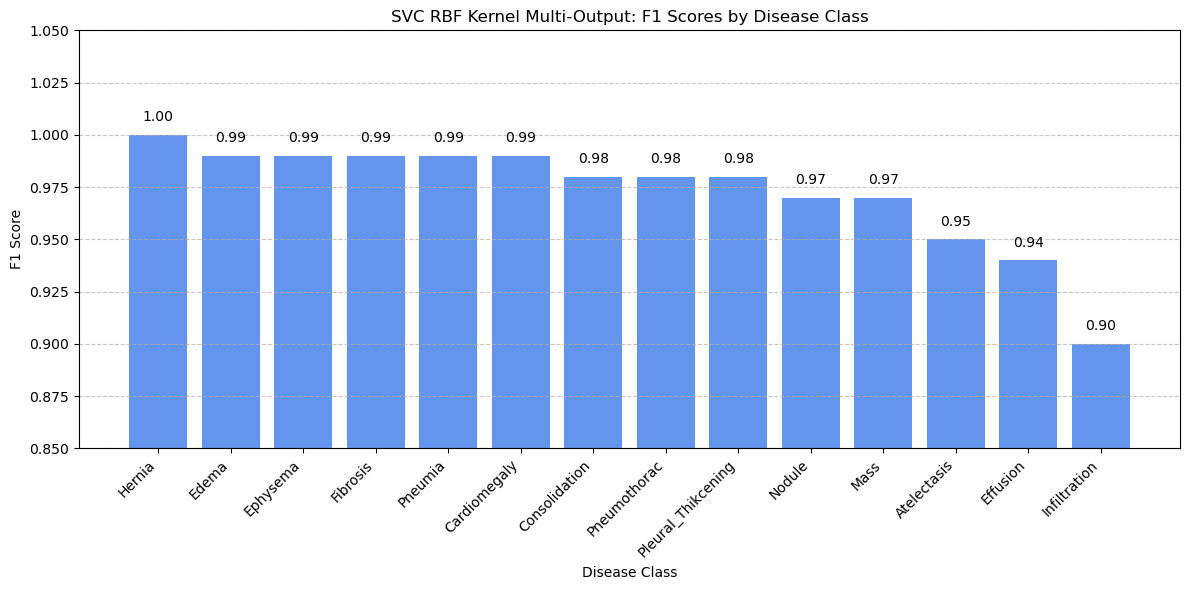

In [24]:
# ---------------------------
# Option 1: Vertical Bar Chart
# ---------------------------
plt.figure(figsize=(12, 6))
bars = plt.bar(f1_score_df["Class"], f1_score_df["f1score"], color="cornflowerblue")

# Annotate each bar with the F1 score value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Disease Class")
plt.ylabel("F1 Score")
plt.title("SVC RBF Kernel Multi-Output: F1 Scores by Disease Class")
plt.ylim(0.85, 1.05)  # Adjust y-limit for clear annotation space
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

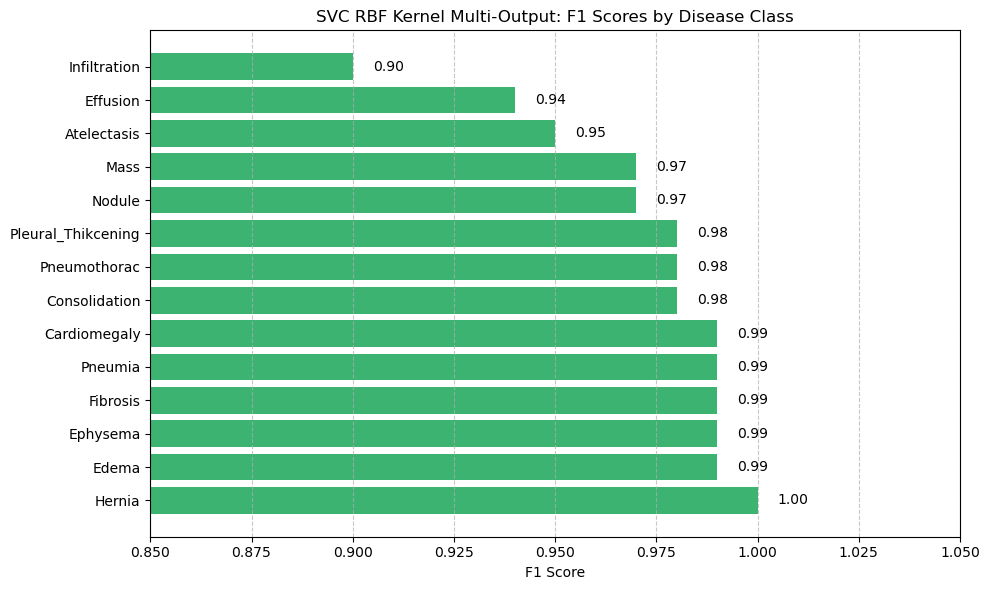

In [25]:
# ---------------------------
# Option 2: Horizontal Bar Chart
# ---------------------------
plt.figure(figsize=(10, 6))
bars = plt.barh(f1_score_df["Class"], f1_score_df["f1score"], color="mediumseagreen")

# Annotate each bar with the F1 score value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f"{width:.2f}", ha="left", va="center", fontsize=10)

plt.xlabel("F1 Score")
plt.title("SVC RBF Kernel Multi-Output: F1 Scores by Disease Class")
plt.xlim(0.85, 1.05)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()